In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
train_df = pd.read_excel("Data_Train.xlsx")

In [407]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [408]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [409]:
train_df['Arrival_Time'].dtype

dtype('O')

In [410]:
train_df.corr()

,Price
Price,1.0


In [411]:
train_df['Date_of_Journey'].nunique()

44

In [412]:
train_df['Route'].nunique()

128

In [413]:
train_df['Dep_Time'].nunique()

222

In [414]:
train_df['Arrival_Time'].nunique()

1343

In [415]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [416]:
train_df.shape

(10683, 11)

In [417]:
# As there is only 1 null value, we dropped it
train_df.dropna(inplace=True)

In [418]:
train_df.shape

(10682, 11)

In [419]:
# Convert the date to day
train_df['Journey_day'] = pd.to_datetime(train_df['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [420]:
# Convert the date to month
train_df['Journey_Month'] = pd.to_datetime(train_df['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [421]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [422]:
# Adding the column weekday as the prices may vary from weekday to weekend

train_df['Journey_Weekday'] = pd.to_datetime(train_df['Date_of_Journey'], format="%d/%m/%Y").dt.weekday

In [423]:
train_df['Journey_day'].dtype

dtype('int64')

In [424]:
# We are ignoring the year part of the date as we only have data for 2019
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [425]:
train_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,1
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,5
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,5
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,4


In [426]:
# Now converting the Departure time columns into Hour and mins

train_df['Departure_Hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour


train_df['Departure_Mins'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

In [427]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Weekday,Departure_Hour,Departure_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50


In [428]:
train_df.drop(['Dep_Time'], axis=1, inplace=True)

In [429]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Weekday,Departure_Hour,Departure_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,1,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,5,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,5,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,4,11,30


In [430]:
# Need to convert the duration time into hour and mins
count = 0
for i in train_df['Duration']:
    duration = i.split(" ")
     
    if len(duration)!=2:
        if 'h' in duration[0]:
            duration.append('0m')
        else:
            duration =['0h'] +duration
    train_df['Duration'][count] = duration[0][:-1]+ " " +duration[1][:-1]
    count = count+1
    
train_df['Duration'][count] = duration[0][:-1]+ " " +duration[1][:-1]

C:\Users\000PHC~1\AppData\Local\Temp/ipykernel_18688/2172611757.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Duration'][count] = duration[0][:-1]+ " " +duration[1][:-1]
C:\Users\000PHC~1\AppData\Local\Temp/ipykernel_18688/2172611757.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Duration'][count] = duration[0][:-1]+ " " +duration[1][:-1]


In [431]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Weekday,Departure_Hour,Departure_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2 50,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7 25,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19 0,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5 25,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4 45,1 stop,No info,13302,1,3,4,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2 35,non-stop,No info,4107,9,4,1,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,3 0,non-stop,No info,4145,27,4,5,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,2 40,non-stop,No info,7229,27,4,5,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,8 20,non-stop,No info,12648,1,3,4,11,30


In [432]:
# Here we have split the duration columns values to hour and mins
train_df[['duration_hour', 'duration_mins']] = train_df['Duration'].str.split(" ", expand=True)

In [433]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Weekday,Departure_Hour,Departure_Mins,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2 50,non-stop,No info,3897,24,3,6,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7 25,2 stops,No info,7662,1,5,2,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19 0,2 stops,No info,13882,9,6,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5 25,1 stop,No info,6218,12,5,6,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4 45,1 stop,No info,13302,1,3,4,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2 35,non-stop,No info,4107,9,4,1,19,55,2,35
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,3 0,non-stop,No info,4145,27,4,5,20,45,3,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,2 40,non-stop,No info,7229,27,4,5,8,20,2,40
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,8 20,non-stop,No info,12648,1,3,4,11,30,8,20


In [434]:
# convert the categorical data to dummy variables
Airline = pd.get_dummies(train_df['Airline'], drop_first=True)
Source = pd.get_dummies(train_df['Source'], drop_first=True)
Destination = pd.get_dummies(train_df['Destination'], drop_first=True)

In [435]:
train_df = pd.concat([train_df, Airline, Source, Destination], axis=1)

In [436]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2 50,non-stop,No info,3897,24,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7 25,2 stops,No info,7662,1,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19 0,2 stops,No info,13882,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5 25,1 stop,No info,6218,12,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4 45,1 stop,No info,13302,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2 35,non-stop,No info,4107,9,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,3 0,non-stop,No info,4145,27,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,2 40,non-stop,No info,7229,27,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,8 20,non-stop,No info,12648,1,...,0,0,0,0,0,0,0,0,0,1


In [437]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [438]:
# As Total_Stops column is ordinal column which affect the price, creating ordered values instead of dummy variables.
stops = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4 }

train_df = train_df.replace({'Total_Stops': stops})

In [439]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2 50,0,No info,3897,24,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7 25,2,No info,7662,1,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19 0,2,No info,13882,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5 25,1,No info,6218,12,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4 45,1,No info,13302,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2 35,0,No info,4107,9,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,3 0,0,No info,4145,27,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,2 40,0,No info,7229,27,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,8 20,0,No info,12648,1,...,0,0,0,0,0,0,0,0,0,1


In [440]:
# Now converting the Arrival time columns into Hour and mins

train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour


train_df['Arrival_Mins'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute

In [441]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Arrival_Hour,Arrival_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2 50,0,No info,3897,24,...,0,0,0,0,0,0,0,1,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7 25,2,No info,7662,1,...,0,1,0,0,0,0,0,0,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19 0,2,No info,13882,9,...,1,0,0,1,0,0,0,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5 25,1,No info,6218,12,...,0,1,0,0,0,0,0,0,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4 45,1,No info,13302,1,...,0,0,0,0,0,0,0,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2 35,0,No info,4107,9,...,0,1,0,0,0,0,0,0,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,3 0,0,No info,4145,27,...,0,1,0,0,0,0,0,0,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,2 40,0,No info,7229,27,...,0,0,0,0,1,0,0,0,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,8 20,0,No info,12648,1,...,0,0,0,0,0,0,0,1,14,10


In [442]:
# As we have total stops detail so we don't need Route column anymore and other duplicate columns also we will drop

train_df = train_df.drop(['Airline', 'Source', 'Destination', 'Arrival_Time','Duration', 'Route', 'Additional_Info'], axis=1)

In [443]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   Journey_day                        10682 non-null  int64 
 3   Journey_Month                      10682 non-null  int64 
 4   Journey_Weekday                    10682 non-null  int64 
 5   Departure_Hour                     10682 non-null  int64 
 6   Departure_Mins                     10682 non-null  int64 
 7   duration_hour                      10682 non-null  object
 8   duration_mins                      10682 non-null  object
 9   Air India                          10682 non-null  uint8 
 10  GoAir                              10682 non-null  uint8 
 11  IndiGo                             10682 non-null  uint8 
 12  Jet 

In [444]:
train_df['duration_hour'] = train_df['duration_hour'].astype(int)
train_df['duration_mins'] = train_df['duration_mins'].astype(int)

C:\Users\000PHC~1\AppData\Local\Temp/ipykernel_18688/3126685038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['duration_hour'] = train_df['duration_hour'].astype(int)
C:\Users\000PHC~1\AppData\Local\Temp/ipykernel_18688/3126685038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['duration_mins'] = train_df['duration_mins'].astype(int)


In [445]:
train_df

,Total_Stops,Price,Journey_day,Journey_Month,Journey_Weekday,Departure_Hour,Departure_Mins,duration_hour,duration_mins,Air India,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Arrival_Hour,Arrival_Mins
0,0,3897,24,3,6,22,20,2,50,0,...,0,0,0,0,0,0,0,1,1,10
1,2,7662,1,5,2,5,50,7,25,1,...,0,1,0,0,0,0,0,0,13,15
2,2,13882,9,6,6,9,25,19,0,0,...,1,0,0,1,0,0,0,0,4,25
3,1,6218,12,5,6,18,5,5,25,0,...,0,1,0,0,0,0,0,0,23,30
4,1,13302,1,3,4,16,50,4,45,0,...,0,0,0,0,0,0,0,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,1,19,55,2,35,0,...,0,1,0,0,0,0,0,0,22,25
10679,0,4145,27,4,5,20,45,3,0,1,...,0,1,0,0,0,0,0,0,23,20
10680,0,7229,27,4,5,8,20,2,40,0,...,0,0,0,0,1,0,0,0,11,20
10681,0,12648,1,3,4,11,30,8,20,0,...,0,0,0,0,0,0,0,1,14,10


In [446]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_day                        10682 non-null  int64
 3   Journey_Month                      10682 non-null  int64
 4   Journey_Weekday                    10682 non-null  int64
 5   Departure_Hour                     10682 non-null  int64
 6   Departure_Mins                     10682 non-null  int64
 7   duration_hour                      10682 non-null  int32
 8   duration_mins                      10682 non-null  int32
 9   Air India                          10682 non-null  uint8
 10  GoAir                              10682 non-null  uint8
 11  IndiGo                             10682 non-null  uint8
 12  Jet Airways       

<AxesSubplot:>

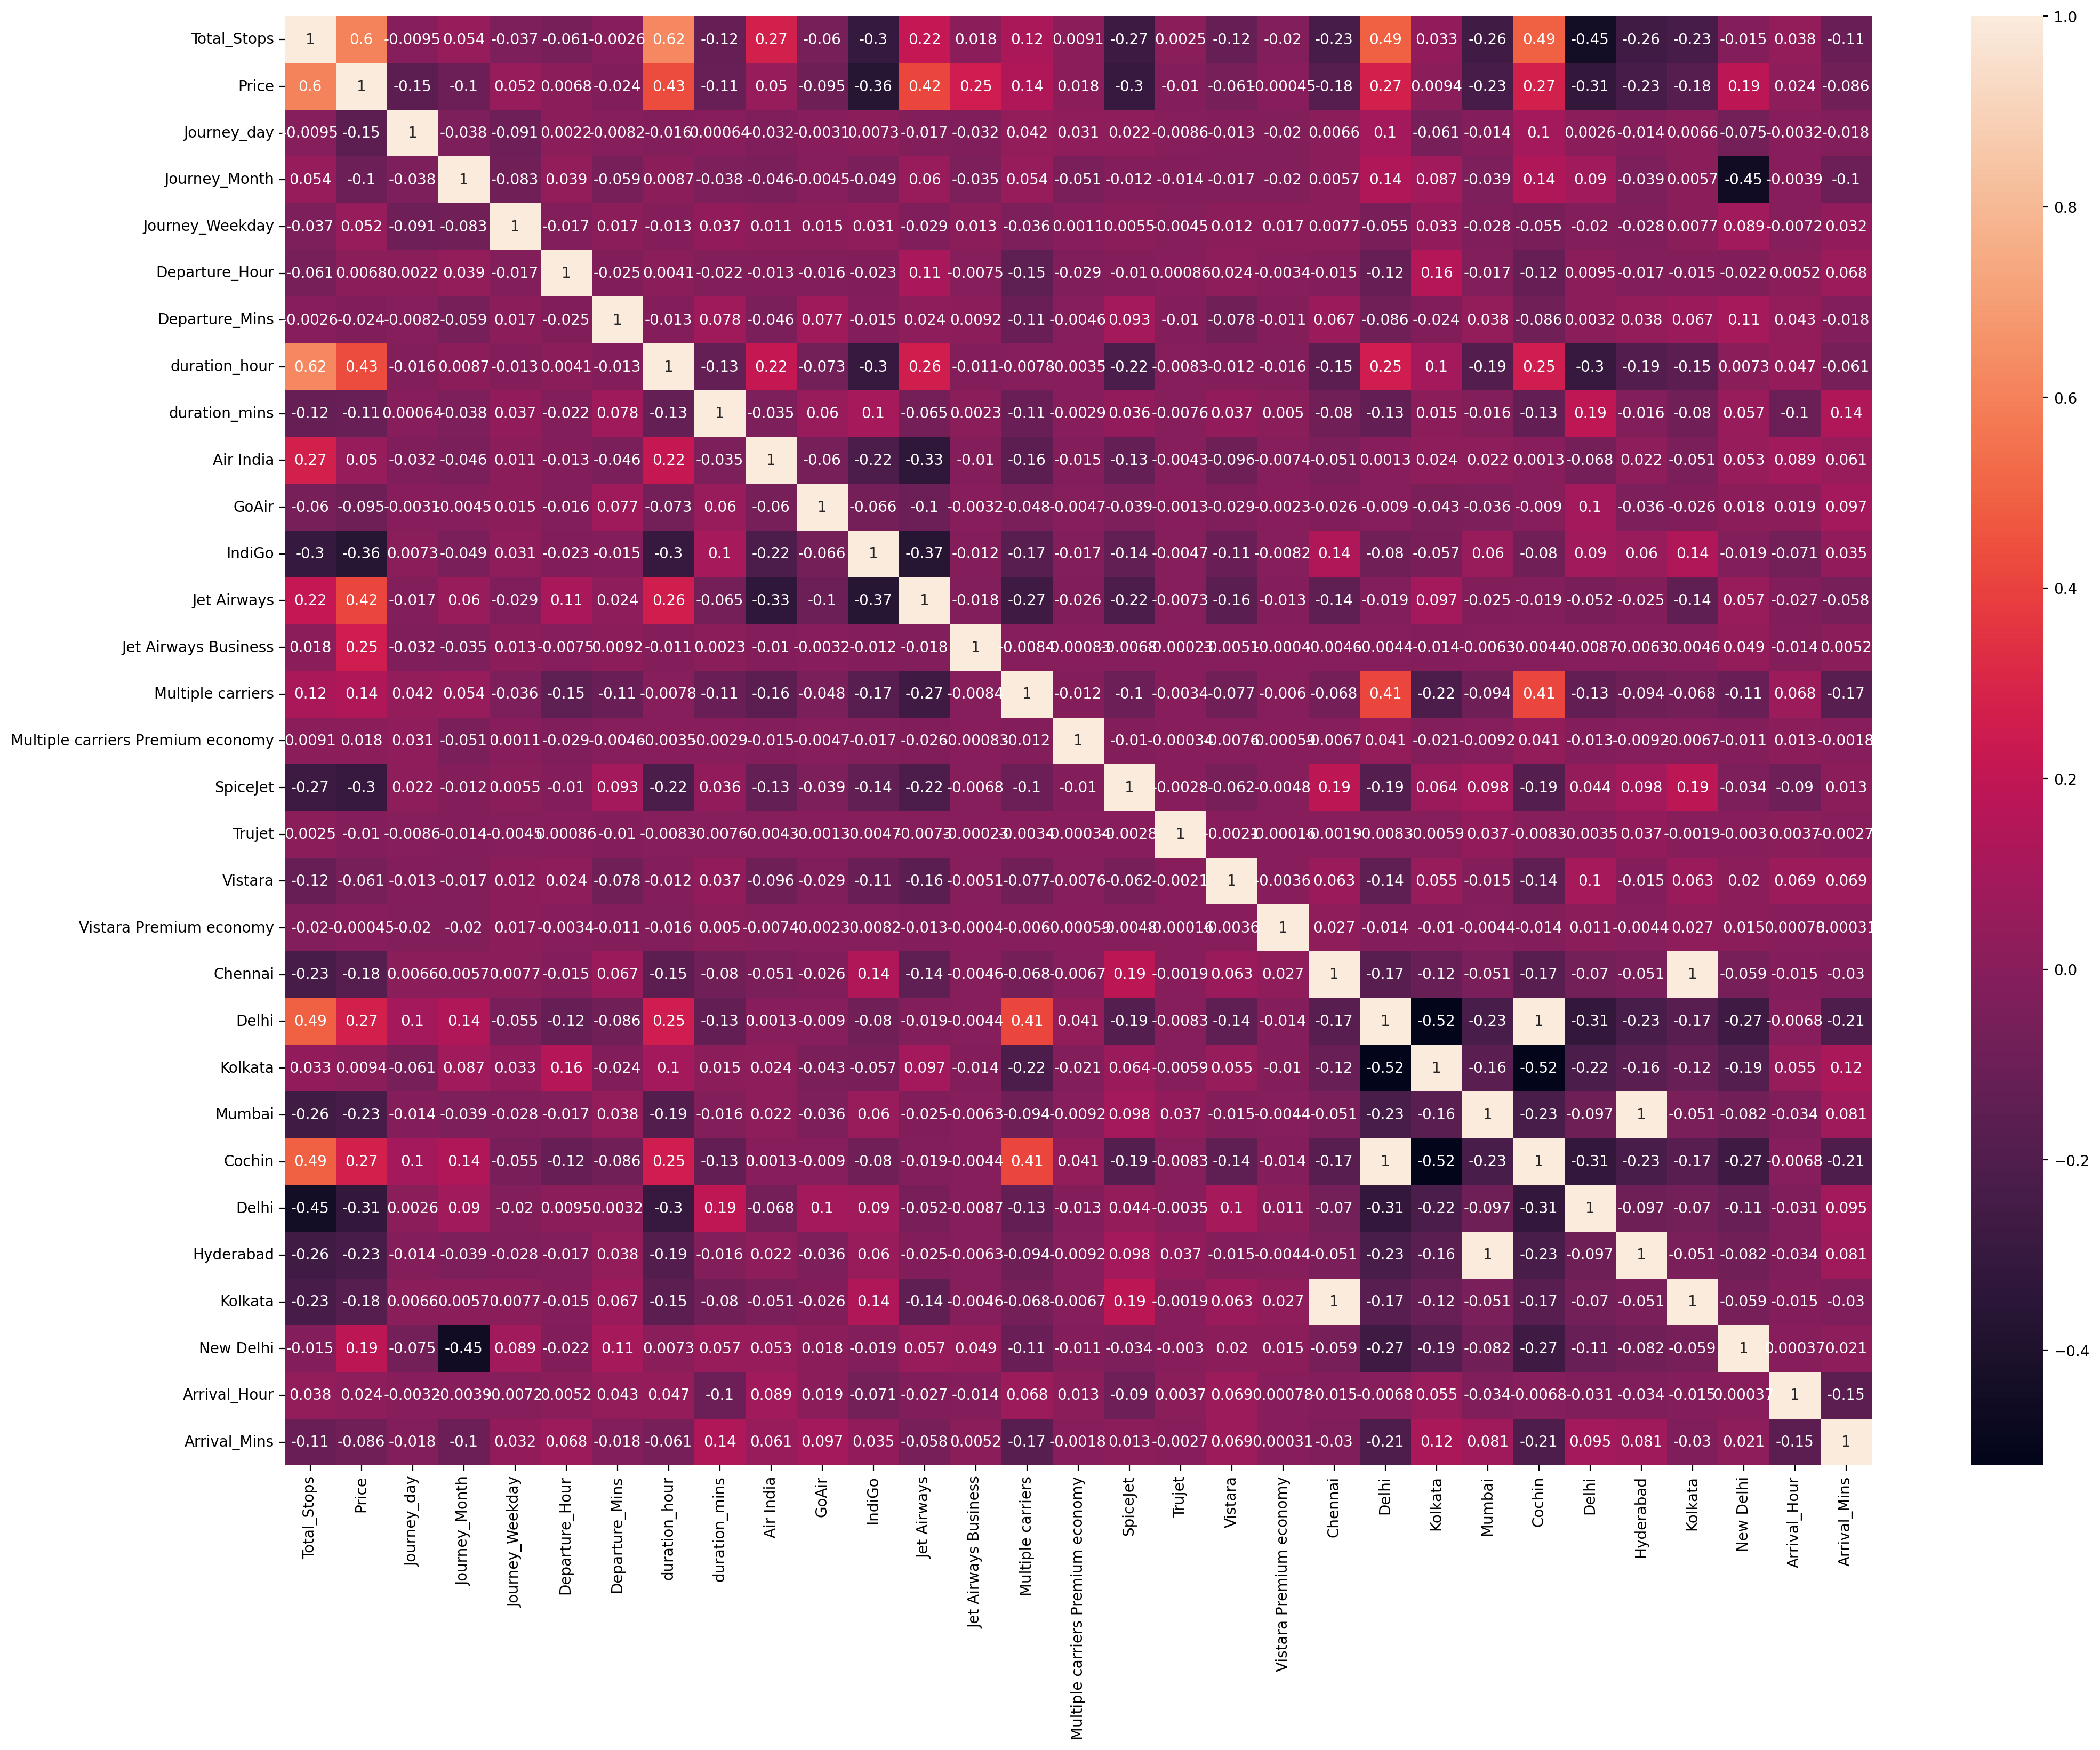

In [453]:
plt.figure(figsize=(24,18), dpi=200)
sns.heatmap(train_df.corr(), annot=True)

In [454]:
X = train_df.drop('Price',axis=1)
y = train_df['Price']

In [456]:
# split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=48)

In [457]:
X_train.shape

(8545, 30)

In [506]:
# scale the data using standardscaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [507]:
Scaled_Xtrain = scaler.fit_transform(X_train)
Scaled_Xtest = scaler.transform(X_test)

# 1. Linear Regression

In [508]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [510]:
model.fit(Scaled_Xtrain, y_train)

LinearRegression()

In [511]:
y_pred = model.predict(Scaled_Xtest)

In [514]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean absolute error is {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error is {}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean squared error is {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean absolute error is 2022.3048192488843
Mean squared error is 9718591.532970063
Root Mean squared error is 3117.4655624353036
